### Kindly cite this notebook in your publications if you use it for calculations.

### Cite as : NyroMDNotebook v1, Girinath G. Pillai : https://github.com/giribio/ModellerNotebooks

###### Used the tutorial from Salilab : https://salilab.org/modeller/tutorial/basic.html

In [ ]:
# Install anaconda from the web
# https://www.anaconda.com/products/individual

###### numpy and matplotlib required for result analysis and ploting

Install MODELLER using the following commands
Ensure Anaconda is installed, therefore python3, conda, pip3, jupyter notebook and others are installed

TESTED in LINUX and MACOSX, In Windows this notebook should work, 
but change commands for curl/wget/cat/etc as per the OS requirements.
Create a folder and run the notebook within folder and download all supporting files.

In [30]:
conda config --add channels salilab


Note: you may need to restart the kernel to use updated packages.


In [31]:
conda install modeller

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Go to https://salilab.org/modeller/ to get a license key,
and then set the 'license' variable to it in the file
~/<miniconda or anaconda>/lib/modeller-9.25/modlib/modeller/config.py

# Basic Homology Modeling

Model a sequence with high identity to a template.
This exercise introduces the use of MODELLER in a simple case where 
the template selection and target-template alignments are not a problem.

Download the latest PDB sequence database from https://salilab.org/modeller/downloads/pdb_95.pir.gz

In [ ]:
#To download latest PDB sequence database in PIR file
!curl https://salilab.org/modeller/downloads/pdb_95.pir.gz -o pdb_95.pir.gz

In [ ]:
#Unzip the file
!gunzip pdb_95.pir.gz

## Searching template structures related to target sequence

Which ever Target sequence, you would like to model, get the FASTA format of the sequence
And make generate PIR format which is readable by MODELLER with file extension .ali

SAMPLE
>P1;CODE ##CODE (used in next line too) - some letters to represent target sequence##
sequence:CODE:::::0.00:0.00 ##
##FASTA FORMAT SEQUENCE##
and at the end * (symbol without gap or space represents end of sequence)
Then save the file with .ali as file extension, in this example we used the following 
sequence and filename with TvLDH.ali (copy paste the following to editor and save as TvLDH.ali)
''''
>P1;TvLDH
sequence:TvLDH:::::::0.00: 0.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*
''''

In [1]:
from modeller import *

log.verbose()
env = environ()

#-- Prepare the input files

#-- Read in the sequence database
sdb = sequence_db(env)
sdb.read(seq_database_file='pdb_95.pir', seq_database_format='PIR',
         chains_list='ALL', minmax_db_seq_len=(30, 4000), clean_sequences=True)

#-- Write the sequence database in binary form
sdb.write(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
          chains_list='ALL')

#-- Now, read in the binary database
sdb.read(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
         chains_list='ALL')

#-- Read the target sequence/alignment in .ali format
aln = alignment(env)
aln.append(file='TvLDH.ali', alignment_format='PIR', align_codes='ALL')

#-- Convert the input sequence/alignment into
#   profile format
prf = aln.to_profile()

#-- Scan sequence database to pick up homologous sequences
# *** Feel free to make changes in gap penalties, aln evalue and others if you are aware of the significance

prf.build(sdb, matrix_offset=-450, rr_file='${LIB}/blosum62.sim.mat',
          gap_penalties_1d=(-500, -50), n_prof_iterations=1,
          check_profile=False, max_aln_evalue=0.01)

#-- Write out the profile in text format
prf.write(file='build_profile.prf', profile_format='TEXT')

#-- Convert the profile back to alignment format
aln = prf.to_alignment()

#-- Write out the alignment file
aln.write(file='build_profile.ali', alignment_format='PIR')



                         MODELLER 9.25, 2020/09/03, r11894

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Girinaths-MacBook-Pro.local 19.6.0 x86_64
Date and time of c

profile_iteration_> processing sequence:   67191    335      1    22.8400002     0.0003399     0.0000013  2942
 AVERAGE RESIDUAL STANDARD ERROR:    26.38443
 AVERAGE RESIDUAL STANDARD DEVIATION:    247.6263
profile_660_> Quality of the fit between observed/expected score distributions.
              [Iteration, Chi2, nbins, KS-Stat, nscores ] =        1,        0.0182,      121,        0.0067,    67192

HISTOGRAM OF Z-SCORES:

Z:         1  -3.95000   0.00000   0.00000
Z:         1  -3.85000   0.00000   0.00000
Z:         1  -3.75000   0.00000   0.00000
Z:         1  -3.65000   0.00000   0.00000
Z:         1  -3.55000   0.00000   0.00000
Z:         1  -3.45000   0.00000   0.00000
Z:         1  -3.35000   0.00000   0.00000
Z:         1  -3.25000   0.00000   0.00000
Z:         1  -3.15000   0.00000   0.00000
Z:         1  -3.05000   0.00000   0.00000
Z:         1  -2.95000   0.00000   0.00000
Z:         1  -2.85000   0.00000   0.00000
Z:         1  -2.75000   0.00000   0.00000
Z:        

> 1civA                      1   51585   23950     374     335   34.66     0.0          74   325     6   334    33   358
> 5nqbA                      1   52324    5650     331     335   25.94    0.57E-04      75   207    85   301    93   304
> 6um4A                      1   52654   25750     326     335   37.93     0.0          76   317     7   331     8   326
> 4m1qA                      1   57644    5300     312     335   23.64    0.32E-03      77   162    78   242    69   233
> 1pzgA                      1   58602    6350     327     335   30.00    0.15E-05      78   114    74   191    71   190
> 2x0jA                      1   58672    5700     294     335   27.98    0.38E-04      79   218    78   320    68   285
> 5ujkA                      1   59017    6150     315     335   31.58    0.40E-05      80   169    13   191    10   180
> 4ajjA                      1   59997    5750     330     335   25.47    0.34E-04      81   207    85   301    92   303
> 3nepX                      1  

## Selecting a template

In [32]:
#Six PDB sequences show very significant similarities to the 
#query sequence with e-values equal to 0
!cat build_profile.prf

# Number of sequences:     84
# Length of profile  :    335
# N_PROF_ITERATIONS  :      1
# GAP_PENALTIES_1D   :   -500.0   -50.0
# MATRIX_OFFSET      : -450.0
# RR_FILE            : ${LIB}/blosum62.sim.mat
    1 TvLDH                                    S     0   335     1   335     0     0     0    0.    0.0     MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKIGHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVVEGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG
    2 3d5tA                                    X     1   321     4   325     3   316   312   44.    0.0     ---AKRVAVTGAAGQIAYSLLFRIANGDLLGDQPVILQLLDLPQAQAAVKGVVMELDDCAFPLLAGVVITDDPKVAFKDADVALLVGARP--RSMERKDLLSANAEIFTVQGAALNEVASRDVKVLVVGNPANTNAYIAMKSAPDLPKKNFTAMLRLDHNRALSQLAAKSGKPVASIEKLAVWGNHSPTMYPDFRFA--TAEGESLKLIN--DDVWNRDTFIPTVGKRGAAIIEARGLSSA

In [5]:
!cat build_profile.ali


>P1;TvLDH
sequence:TvLDH:    0: :    0: :::-1.00:-1.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*

>P1;3d5tA
structure:3d5tA:    3: :  316: :::-1.00:-1.00
---AKRVAVTGAAGQIAYSLLFRIANGDLLGDQPVILQLLDLPQAQAAVKGVVMELDDCAFPLLAGVVITDDPKV
AFKDADVALLVGARP--RSMERKDLLSANAEIFTVQGAALNEVASRDVKVLVVGNPANTNAYIAMKSAPDLPKKN
FTAMLRLDHNRALSQLAAKSGKPVASIEKLAVWGNHSPTMYPDFRFA--TAEGESLKLIN--DDVWNRDTFIPTV
GKRGAAIIEARGLSSAASAANAAIDHVRDWVLGT-NGKWVTMGI--PSDGSYGIPEDIIYGVPV-ICENGEYKRV
EGLEIDAFSREKMDGTLAELLEERD----------*

>P1;1sovA
structure:1sovA:   76: :  248: :::-1.00:-1.00
---------------------------------------------------------------------------

MGMANVLDSARFRRFIADQLEISPRDIQATVI-GTHGDHMLPLARYVTFIKKGKEAKLAEIVERT------

In [14]:
#Select the most appropriate template for our query sequence over the six similar PDB structures
#Download the pdb files either manually from RCSB or using following command in Linux/MacOSX (wget/curl)

#Change PDBIDs in the following link and after -o option (all in small letters)
!curl https://files.rcsb.org/download/4h7p.pdb -o 4h7p.pdb

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  825k    0  825k    0     0  62044      0 --:--:--  0:00:13 --:--:-- 91810:12 --:--:-- 85902


In [15]:
from modeller import *

env = environ()
aln = alignment(env)
#update the following PDB ID and chain from the selected template sturctures
for (pdb, chain) in (('3d5t', 'A'), ('6itk', 'A'), ('5mdh', 'A'),
                     ('1bdm', 'A'), ('7mdh', 'A'), ('4h7p', 'A')):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
aln.id_table(matrix_file='family.mat')
env.dendrogram(matrix_file='family.mat', cluster_cut=-1.0)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1265579    1235.917     1.207

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1266107    1236.433     1.207
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1314707    1283.894     1.254
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1328007    1296.882     1.266
openf___224_> Open           $


Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      2809513    2743.665     2.679

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      2809587    2743.737     2.679

Multiple dynamic programming alignment (MALIGN):
  Residue-residue metric  : $(LIB)/as1.sim.mat
  ALIGN_BLOCK             :            1
  Gap introduction penalty:    -900.0000
  Gap extension penalty   :     -50.0000
  Length of alignment     :          356
fndatmi_285W> Only      317 residues out of      318 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      2813233    2747.298     2.683

Dynamically allocated memory at   amaxstructure [B,KiB,MiB]:      2936777    2867.946     2.801
malign3_328_> Initial framework positions:      321
malign3_330_> Framework, Cycles, RMS_frw(i-1,i):        1        3        0.0000

Dynami

1bdmA      47576   47522   47701   0.000   0.706   0.670
7mdhA      50311   48905   48769   48195   0.000   0.836
4h7pA      45647   44179   44518   43354   47180   0.000

>> Sequence comparison: 

       Diag=numb res, Upper=numb equiv res, Lower = % seq ID


            3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA
3d5tA         321     176     166     199     147     158
6itkA          55     318     146     172     145     145
5mdhA          52      46     333     169     142     144
1bdmA          63      54      53     318     152     157
7mdhA          46      46      43      48     351     136
4h7pA          50      46      46      50      43     313


>> Dihedral angle comparison: Alph


       Cutoff for rms comparison:    60.0000

       Upper = RMS Alph, Lower = numb of equiv angles

        3d5tA   6itkA   5mdhA   1bdmA   7mdhA   4h7pA   
3d5tA      0.000  12.193  13.025  13.697  15.605  12.323
6itkA        310   0.000  12.182  11.343  15.326  11.401
5mdhA        303     2


         3d5tA @26itkA @25mdhA @21bdmA @17mdhA @24h7pA @1
3d5tA @2      321     176     166     199     147     158
6itkA @2       55     318     146     172     145     145
5mdhA @2       52      46     333     169     142     144
1bdmA @1       63      54      53     318     152     157
7mdhA @2       46      46      43      48     351     136
4h7pA @1       50      46      46      50      43     313
openf___224_> Open           family.mat


Weighted pair-group average clustering based on a distance matrix:



Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      2949729    2880.595     2.813
                                                               .--- 3d5tA @2.5    37.0000
                                                               |
                                       .--------------------------- 1bdmA @1.8    45.5000
                                       |
                       .------------------------------------------- 6itkA @2.0    50.7500
         

## Aligning target sequence with a template

In [22]:
# based on the distance matrix, we picket 4h7p as template
# you could try more templates
from modeller import *

env = environ()
aln = alignment(env)

#update the following with the best selected template (less resolution value and better similarity/identity)
mdl = model(env, file='4h7p', model_segment=('FIRST:A','LAST:A'))
#define the pdb file of the template
aln.append_model(mdl, align_codes='4h7p', atom_files='4h7p.pdb')
aln.append(file='TvLDH.ali', align_codes='TvLDH')
aln.align2d()
aln.write(file='TvLDH-4h7pA.ali', alignment_format='PIR')
aln.write(file='TvLDH-4h7pA.pap', alignment_format='PAP')

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      4047732    3952.863     3.860

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      4048260    3953.379     3.861
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      4096860    4000.840     3.907
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      4110160    4013.828     3.920
openf___224_> Open           $

In [23]:
#Alignment between target and selected template
!cat TvLDH-4h7pA.ali


>P1;4h7p
structureX:4h7p.pdb:   1 :A:+313 :A:MOL_ID  1; MOLECULE  MALATE DEHYDROGENASE; CHAIN  A, B; EC  1.1.1.37; ENGINEERED  YES:MOL_ID  1; ORGANISM_SCIENTIFIC  LEISHMANIA MAJOR; ORGANISM_TAXID  347515; STRAIN  FRIEDLIN; GENE  CMDH, LMJF_28_2860; EXPRESSION_SYSTEM  ESCHERICHIA COLI; EXPRESSION_SYSTEM_TAXID  469008; EXPRESSION_SYSTEM_STRAIN  BL21(DE3); EXPRESSION_SYSTEM_VECTOR_TYPE  PLASMID; EXPRESSION_SYSTEM_PLASMID  AVA0421: 1.30: 0.15
MS-AVKVAVTGAAGQIGYALVPLIARGALLGPTTPVELRLLDIEPALKALAGVEAELEDCAFPLLDKVVVTADPR
VAFDGVAIAIMCGAFPRKAGMERKDLLEMNARIFKEQGEAIAAVAASDCRVVVVGNPANTNALILLKSAQGKLNP
RHVTAMTRLDHNRALSLLARKAGVPVSQVRNVIIWGNHSSTQVPDTDSAVI---G-TTPAREAI------KDFVQ
VVRGRGAEIIQLRGLSSAMSAAKAAVDHVHDWIHGTPEGVYVSMGVYSDE-NPYGVPSGLIFSFPCTCH-AGEWT
VVSG-K----LKQRLASTIAELQEERAQA------GL*

>P1;TvLDH
sequence:TvLDH:     : :     : ::: 0.00: 0.00
MSEAAHVLITGAAGQIGYILSHWIASGELYG-DRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPK
AAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAK-NLKP
ENFSS

In [24]:
#Alignment between target and selected template
!cat TvLDH-4h7pA.pap

 _aln.pos         10        20        30        40        50        60
4h7p      MS-AVKVAVTGAAGQIGYALVPLIARGALLGPTTPVELRLLDIEPALKALAGVEAELEDCAFPLLDKV 
TvLDH     MSEAAHVLITGAAGQIGYILSHWIASGELYG-DRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGF 
 _consrvd ** *  *  ********* *   ** * * *    * * **** **   *     ******** *

 _aln.p   70        80        90       100       110       120       130
4h7p      VVTADPRVAFDGVAIAIMCGAFPRKAGMERKDLLEMNARIFKEQGEAIAAVAASDCRVVVVGNPANTN 
TvLDH     VATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTN 
 _consrvd * * **  **     *      * * *  * **   *  ***  **     *     * * *** ***

 _aln.pos  140       150       160       170       180       190       200
4h7p      ALILLKSAQGKLNPRHVTAMTRLDHNRALSLLARKAGVPVSQVRNVIIWGNHSSTQVPDTDSAVI--- 
TvLDH     CEIAMLHAK-NLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKE 
 _consrvd   *    *   * *        ** ***    * * ** *  *   * ****    * *   *

 _aln.pos    210       220       230       240       250       260   

## Model building 

In [33]:
from modeller import *
from modeller.automodel import *
#from modeller import soap_protein_od

env = environ()
a = automodel(env, alnfile='TvLDH-4h7pA.ali',
#use the correct code used for template as well as for the target sequence
              knowns='4h7p', sequence='TvLDH',
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model = 1
a.ending_model = 5
a.make()

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     23570051   23017.629    22.478

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     23570579   23018.145    22.479
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     23619179   23065.605    22.525
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     23632479   23078.594    22.538
openf___224_> Open           $

errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5        1  MET
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5       92  LYS
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5       98  LYS
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      103  MET
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      106  ARG
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      110  GLU
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      146  LYS
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      179  ARG
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      206  ARG
errdih__638_> Missing atoms in a dihedral, residue index, residue type:        5      210  LYS
errdih__638_> Missing atoms in a dihedral, residue

make_re_422_> Number of previous, current restraints         :    29819    30983
make_re_423_> Number of previous, current selected restraints:    29469    30633
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
make_re_417_> Restraint type to be calculated:  DISTANCE
make_re_422_> Number of previous, current restraints         :    30983    30983
make_re_423_> Number of previous, current selected restraints:    30633    30633
make_re_417_> Restraint type to be calculated:  DISTANCE
make_re_422_> Number of previous, current restraints         :    30983    30983
make_re_423_> Number of previous, current selected restraints:    30633    30633
make_re_417_> Restraint type to be calculated:  DISTANCE
make_re_422_> Number of previous, current restraints         :    30983    30983
make_re_423_> Number of previous, current selected restraints:    30633    30633
make_re_417_> Restraint type to be calculated:  DISTANC

pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16215
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    17214
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18511
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    19883
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21676
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    24352
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25479
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    26682
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    27946
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
iupac_m_486_> OE1/2 will be swapped:       96.8119        3     3
iupac_m_483_> CD1/2 CE1/2 swapped:      -95.7645       30    30
iupac_m_397W> Atoms were not swapp

pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16215
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    17214
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18511
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    19883
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21676
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    24352
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25479
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    26682
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    27946
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
iupac_m_486_> OE1/2 will be swapped:      174.6857       28    28
iupac_m_485_> OD1/2 will be swapped:      171.0874       32    32
iupac_m_483_> CD1/2 CE1/2 swappe

pick_re_612_> Number of MODEL atoms, selected restraints;     2605    16215
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    17214
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18511
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    19883
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21676
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    24352
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25479
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    26682
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    27946
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
iupac_m_486_> OE1/2 will be swapped:      168.9492        3     3
iupac_m_486_> OE1/2 will be swapped:      107.9309       55    55
iupac_m_486_> OE1/2 will be swap

pick_re_612_> Number of MODEL atoms, selected restraints;     2605    17214
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    18511
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    19883
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    21676
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    24352
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    25479
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    26682
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    27946
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
pick_re_612_> Number of MODEL atoms, selected restraints;     2605    28594
iupac_m_486_> OE1/2 will be swapped:      134.0706        3     3
iupac_m_487_> NH1/2 swapped:     -177.4750       33    33
iupac_m_487_> NH1/2 swapped:     -178.1775       48    48
iupac_m_485_> OD1/2 will be swapped:     -122.6552       5

## Model evaluation 

In [26]:
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    # request verbose output
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model file with better DOPE Score
mdl = complete_pdb(env, 'TvLDH.B99990001.pdb')

# Assess with DOPE:
s = selection(mdl)   # all atom selection
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='TvLDH.profile',
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     22876049   22339.891    21.816

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     22876577   22340.406    21.817
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     22925177   22387.867    21.863
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     22938477   22400.855    21.876
openf___224_> Open           $

Dynamically allocated memory at  amaxrestraints [B,KiB,MiB]:     32423853   31663.918    30.922


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      335
Number of all, selected real atoms                :     2605    2605
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :        0       0
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):   530733
Dynamic pairs routine                             : 1, NATM x NATM double loop
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        1    9999
NLOGN_USE                           

-37831.59375

## Template Evaluation

In [5]:
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    # request verbose output
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# directories for input atom files
env.io.atom_files_directory = './:../atom_files'

# read model file
mdl = complete_pdb(env, '4h7p.pdb', model_segment=('FIRST:A', 'LAST:A'))

s = selection(mdl)
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='4h7pA.profile',
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1374644    1342.426     1.311

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1375172    1342.941     1.311
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1423772    1390.402     1.358
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1437072    1403.391     1.370
openf___224_> Open           $


Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      4462125    4357.544     4.255

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      4496577    4391.188     4.288

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      4519625    4413.696     4.310

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      4606837    4498.864     4.393

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      5492853    5364.114     5.238

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      5544537    5414.587     5.288

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      5579109    5448.349     5.321

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      5709925    5576.099     5.445

Dynamically allocated memory at amaxgroup_restr [B,KiB,MiB]:      7038949    6873.974     6.713
read_pa_232_> parameters    BONDS   ANGLS  DIHEDS IMPROPS    MODE
                                0       0       0       0   1

-37543.578125

In [2]:
#keep numpy and matplotlib updated for the following script to work
conda update numpy

Solving environment: done

## Package Plan ##

  environment location: /Applications/miniconda3

  added / updated specs:
    - numpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libblas-3.9.0              |       3_openblas          11 KB  conda-forge
    libcblas-3.9.0             |       3_openblas          11 KB  conda-forge
    liblapack-3.9.0            |       3_openblas          11 KB  conda-forge
    numpy-1.19.4               |   py37h9ebeaaa_1         5.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following packages will be REMOVED:

  blas-2.2-openblas
  liblapacke-3.9.0-2_openblas
  numpy-base-1.19.2-py37h68fea81_0

The following packages will be UPDATED:

  libblas                                  3.9.0-2_openblas --> 3.9.0-3_openblas
  libcblas                  

In [1]:
import pylab
import modeller

Matplotlib is building the font cache; this may take a moment.


openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14237075   13903.394    13.578

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14237603   13903.909    13.578
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14286203   13951.370    13.624
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     14299503   13964.358    13.637
openf___224_> Open           $

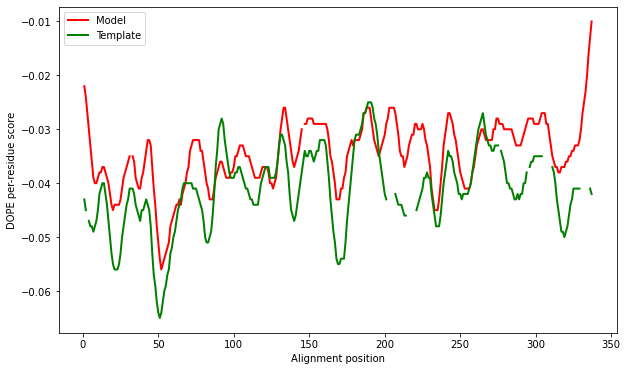

In [6]:


def r_enumerate(seq):
    """Enumerate a sequence in reverse order"""
    # Note that we don't use reversed() since Python 2.3 doesn't have it
    num = len(seq) - 1
    while num >= 0:
        yield num, seq[num]
        num -= 1

def get_profile(profile_file, seq):
    """Read `profile_file` into a Python array, and add gaps corresponding to
       the alignment sequence `seq`."""
    # Read all non-comment and non-blank lines from the file:
    f = open(profile_file)
    vals = []
    for line in f:
        if not line.startswith('#') and len(line) > 10:
            spl = line.split()
            vals.append(float(spl[-1]))
    # Insert gaps into the profile corresponding to those in seq:
    for n, res in r_enumerate(seq.residues):
        for gap in range(res.get_leading_gaps()):
            vals.insert(n, None)
    # Add a gap at position '0', so that we effectively count from 1:
    vals.insert(0, None)
    return vals

e = modeller.environ()
a = modeller.alignment(e, file='TvLDH-4h7pA.ali')

template = get_profile('4h7pA.profile', a['4h7p'])
model = get_profile('TvLDH.profile', a['TvLDH'])

# Plot the template and model profiles in the same plot for comparison:
pylab.figure(1, figsize=(10,6))
pylab.xlabel('Alignment position')
pylab.ylabel('DOPE per-residue score')
pylab.plot(model, color='red', linewidth=2, label='Model')
pylab.plot(template, color='green', linewidth=2, label='Template')
pylab.legend()
pylab.savefig('dope_profile.png', dpi=65)

# This notebook is compiled and verfied by Girinath G. Pillai, @giribio

### Kindly cite this notebook in your publications if you have used it for calculations.

### Cite as : NyroMDNotebook v1, Girinath G. Pillai : https://github.com/giribio/MDNotebooks